Sample Coordinates (Longitude, Latitude):
(np.float64(11448905.452556469), np.float64(-1047470.5381315108))
(np.float64(11449905.452556469), np.float64(-1047470.5381315108))
(np.float64(11450905.452556469), np.float64(-1047470.5381315108))
(np.float64(11451905.452556469), np.float64(-1047470.5381315108))
(np.float64(11452905.452556469), np.float64(-1047470.5381315108))
(np.float64(11453905.452556469), np.float64(-1047470.5381315108))
(np.float64(11454905.452556469), np.float64(-1047470.5381315108))
(np.float64(11455905.452556469), np.float64(-1047470.5381315108))
(np.float64(11456905.452556469), np.float64(-1047470.5381315108))
(np.float64(11457905.452556469), np.float64(-1047470.5381315108))


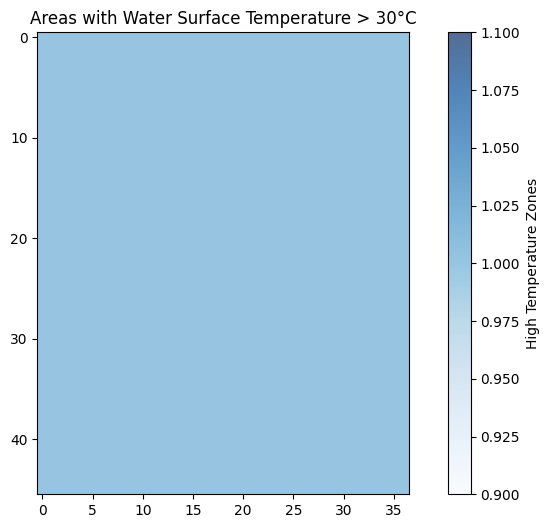

In [11]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Load the GeoTIFF file
thermal_file = "built_up_denpasar.tif"

with rasterio.open(thermal_file) as thermal:
    # Read the thermal band data
    temperature_data = thermal.read(1)
    transform = thermal.transform  # GeoTransform for spatial referencing

# Define a temperature threshold
threshold = 30

# Create a binary mask for areas with temperatures > 25°C
high_temp_areas = np.where(temperature_data < threshold, 1, 0)

# Get pixel coordinates (rows and columns) where high_temp_areas == 1
rows, cols = np.where(high_temp_areas == 1)

# Convert pixel coordinates to geographic coordinates (lat, lon)
lat_lon_coords = [rasterio.transform.xy(transform, row, col) for row, col in zip(rows, cols)]

# Print the first 10 coordinates as an example
print("Sample Coordinates (Longitude, Latitude):")
for coord in lat_lon_coords[:10]:
    print(coord)

# Visualize the high-temperature zones
plt.figure(figsize=(10, 6))
plt.imshow(high_temp_areas, cmap="Blues", alpha=0.7)
plt.title(f"Areas with Water Surface Temperature > {threshold}°C")
plt.colorbar(label="High Temperature Zones")
plt.show()
